In [ ]:
import time
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing  import StandardScaler
from sklearn.decomposition  import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances,manhattan_distances
from sklearn.metrics import silhouette_score,jaccard_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ParameterGrid
from sklearn.manifold import TSNE
from adjustText import adjust_text

In [ ]:
cd

/home/hamza


In [ ]:
df=pd.read_csv("all_data_new_version_mean_for_clustering.csv")

In [ ]:
df.head()

,Unnamed: 0,name,delta_e,ntypes,volume,H,H_rep,Number_mean,MendeleevNumber_mean,AtomicWeight_mean,...,NdValence_mean,NfValence_mean,NValence_mean,NdUnfilled_mean,NfUnfilled_mean,NUnfilled_mean,GSvolume_pa_mean,GSbandgap_mean,SpaceGroupNumber_mean,nA_mean
0,0,Ti20H2N17,-1.743870,3,379.154163,2,1.00000,14.5,62.5,30.936850,...,1.0,0.0,4.5,4.0,0.0,5.5,15.729375,3.2185,194.0,18.5
1,1,CaH3Pd,-0.514892,3,50.929335,3,92.00000,33.0,34.5,73.249000,...,5.0,0.0,6.0,0.0,0.0,0.0,26.090000,0.0000,225.0,1.0
2,2,BeH2,-0.166498,2,140.319142,2,1.00794,2.0,33.5,4.506091,...,0.0,0.0,1.0,0.0,0.0,0.0,3.945000,0.0000,97.0,0.5
3,3,SmH2,-0.767608,2,38.864183,2,14.01000,31.0,11.5,75.180000,...,0.0,3.0,4.0,0.0,4.0,4.0,16.615000,0.0000,83.0,0.5
4,4,As3(HO2)5,-1.459528,3,185.324892,5,1.00000,20.5,85.5,45.460500,...,5.0,0.0,10.5,0.0,0.0,2.5,15.640000,0.0000,89.0,6.5


In [5]:
df.shape

(2851, 23)

In [ ]:
#df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df_copy=df.copy()

In [8]:
df_copy.drop(['name','ntypes'], axis=1, inplace=True)

### Feature scaling 
    Standardization

In [9]:
df_array=df_copy.values

In [20]:
materiau=df[df["name"]=="MgH2"]

In [21]:
materiau

,Unnamed: 0,name,delta_e,ntypes,volume,H,H_rep,Number_mean,MendeleevNumber_mean,AtomicWeight_mean,...,NdValence_mean,NfValence_mean,NValence_mean,NdUnfilled_mean,NfUnfilled_mean,NUnfilled_mean,GSvolume_pa_mean,GSbandgap_mean,SpaceGroupNumber_mean,nA_mean
119,119,MgH2,-0.294409,2,59.972803,2,194.0,6.0,34.0,12.1525,...,0.0,0.0,1.0,0.0,0.0,0.0,11.445,0.0,97.0,0.5
1854,1854,MgH2,-0.068888,2,137.627000,2,0.0,6.0,34.0,12.1525,...,0.0,0.0,1.0,0.0,0.0,0.0,11.445,0.0,97.0,0.5


In [22]:
dict_indix_["0"]

852

In [23]:
#df.iloc[2850]

In [24]:
#

###  We can notice  that  NaZnH3  has  a fort similarity with MgH2 delta_e=-0.068888

In [25]:
#df.iloc[119]

In [26]:
#df.iloc[2850]

In [27]:
#  X_stander to indicate this is np array not dataframe 
X_stander=StandardScaler().fit_transform(df_copy)


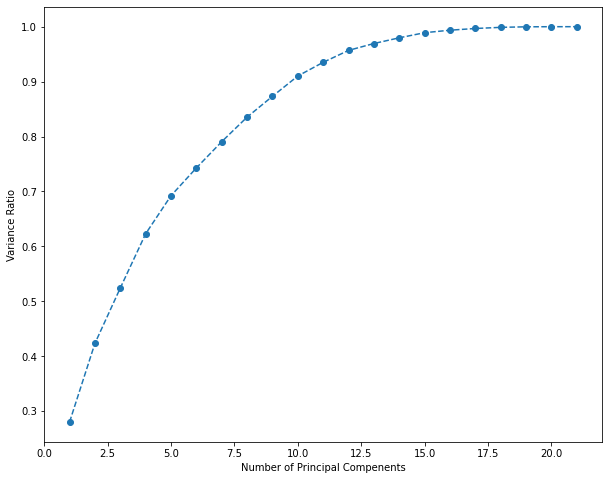

In [28]:


X_stander_pca=PCA().fit(X_stander)



X_stander_pca.explained_variance_ratio_

number_of_compenent=np.size(X_stander_pca.explained_variance_ratio_)

#cos_sim_matrix=cosine_similarity(X_stander)

plt.figure(figsize=(10,8))
plt.plot(range(1,number_of_compenent+1),X_stander_pca.explained_variance_ratio_.cumsum(),marker="o", linestyle='--')
plt.xlabel("Number of Principal Compenents")
plt.ylabel("Variance Ratio")
plt.savefig("Music/PCA_component.png")
Hight_similarity_masc=cos_sim_matrix>0.8

In [29]:
#params=[i for i in range (2,10)]

In [30]:
#params_grid=ParameterGrid({"n_cluster":params})

In [31]:
#params_grid

In [32]:
X_nor=MinMaxScaler().fit_transform(X_stander)

In [33]:
range_of_clusters=[i for i in range(2,10)]

In [34]:
best_score=-1
silhouette_scores=[]

In [35]:
for c in range_of_clusters:
    # K_means_model.set_params(**p)
    K_means_model=KMeans(n_clusters=c)
    K_means_model.fit(X_nor)
    labels=K_means_model.labels_
    ss=silhouette_score(X_nor,labels)
    silhouette_scores+=[ss]
    print('n_clusters',c, 'Score',ss)
    # if ss> best_score:
    #     best_score=ss
    #     #best_grid=p


n_clusters 2 Score 0.1958569379210754
n_clusters 3 Score 0.1728839692516016
n_clusters 4 Score 0.15783681164183547
n_clusters 5 Score 0.1512268874760506
n_clusters 6 Score 0.16192636617855424
n_clusters 7 Score 0.16062147899177948
n_clusters 8 Score 0.16040498696454614
n_clusters 9 Score 0.17216585699621437


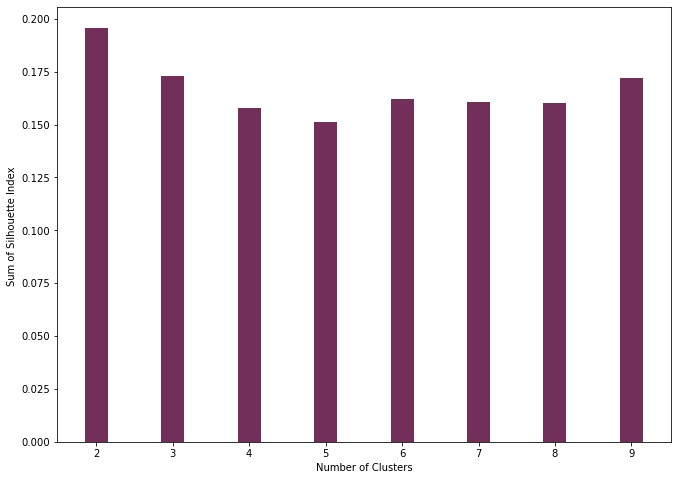

In [36]:
plt.figure(figsize=(11,8))
plt.bar(range(len(silhouette_scores)),silhouette_scores,align='center', color='#722f59',width=0.3)
plt.xticks(range(len(silhouette_scores)),range_of_clusters)
plt.xlabel("Number of Clusters")
plt.ylabel('Sum of Silhouette Index ')
plt.savefig("Music/silhouette_figure.png")
plt.show()

In [37]:
#from sklearn.metrics import davies_bouldin_score

In [38]:
# davies_score={}
# for c in range(2,20):
#     K_means_model=KMeans(n_clusters=c)
#     K_means_model.fit(X_nor)
#     labels=K_means_model.labels_
#     dv_score=davies_bouldin_score(X_nor,labels)
#     davies_score.update({c:dv_score})

In [39]:
#plt.plot(list(davies_score.keys()),list(davies_score.values()))

In [40]:
inertia={}
c_range=range(1,6)
for c in c_range:
    model=KMeans(n_clusters=c)
    model.fit(X_nor)
    inertia.update({c:model.inertia_})

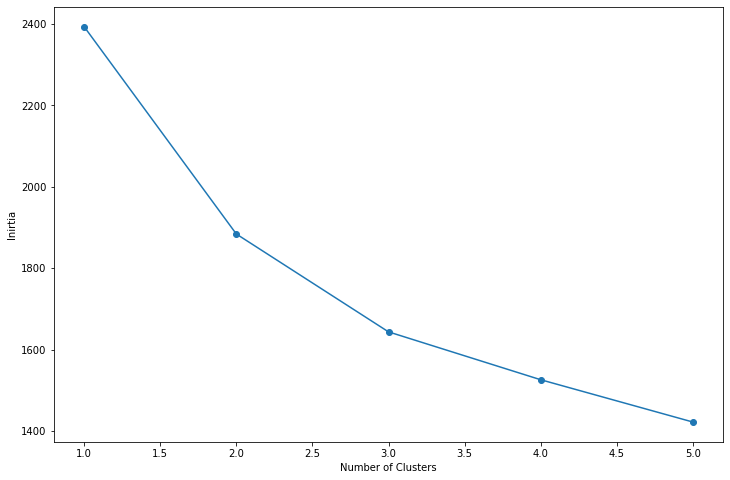

In [41]:
plt.figure(figsize=(12,8))
plt.plot(list(inertia.keys()),list(inertia.values()), marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inirtia')
plt.savefig("Music/elbaw_figure.png")

###  it turns out that the optimal number of cluster is 2  

In [42]:
model=KMeans(n_clusters=2)

In [43]:
model.fit(X_nor)

KMeans(n_clusters=2)

In [44]:
clusters=model.labels_

In [45]:
centres=model.cluster_centers_

In [46]:
len(clusters)

2851

Due to curse dimensionality.

In [47]:
df_copy["clusters"]=clusters

In [48]:
df["clusters"]=clusters

In [49]:
df_cluster1=df_copy[df_copy['clusters']==0]

df_cluster2=df_copy[df_copy['clusters']==1]

#df_cluster3=df_copy[df_copy['clusters']==2]

#df_cluster4=df_copy[df_copy['clusters']==3]

In [50]:
df_cluster1=df[df['clusters']==0]

df_cluster2=df[df['clusters']==1]

In [51]:
df_cluster2

,Unnamed: 0,name,delta_e,ntypes,volume,H,H_rep,Number_mean,MendeleevNumber_mean,AtomicWeight_mean,...,NfValence_mean,NValence_mean,NdUnfilled_mean,NfUnfilled_mean,NUnfilled_mean,GSvolume_pa_mean,GSbandgap_mean,SpaceGroupNumber_mean,nA_mean,clusters
0,0,Ti20H2N17,-1.743870,3,379.154163,2,1.00000,14.5,62.5,30.936850,...,0.0,4.5,4.0,0.0,5.5,15.729375,3.2185,194.0,18.5,1
2,2,BeH2,-0.166498,2,140.319142,2,1.00794,2.0,33.5,4.506091,...,0.0,1.0,0.0,0.0,0.0,3.945000,0.0000,97.0,0.5,1
3,3,SmH2,-0.767608,2,38.864183,2,14.01000,31.0,11.5,75.180000,...,3.0,4.0,0.0,4.0,4.0,16.615000,0.0000,83.0,0.5,1
4,4,As3(HO2)5,-1.459528,3,185.324892,5,1.00000,20.5,85.5,45.460500,...,0.0,10.5,0.0,0.0,2.5,15.640000,0.0000,89.0,6.5,1
5,5,Ca7(H6Cl)2,-0.987079,3,275.933241,12,31.00000,18.5,50.5,37.765500,...,0.0,4.5,0.0,0.0,0.5,31.133750,1.2465,144.5,4.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2826,2826,PH3S4,-0.304924,3,289.875000,3,0.00000,15.5,85.5,31.519381,...,0.0,5.5,0.0,0.0,2.5,24.178557,1.9135,36.0,2.5,1
2827,2827,SmH4O3,-1.529279,3,138.633000,4,0.00000,35.0,55.0,83.179700,...,3.0,7.0,0.0,4.0,5.0,21.167500,0.0000,89.0,2.0,1
2829,2829,SmH2O2,-1.799042,3,200.136000,2,0.00000,35.0,55.0,83.179700,...,3.0,7.0,0.0,4.0,5.0,21.167500,0.0000,89.0,1.5,1
2830,2830,TmH2O2,-1.888531,3,54.290500,2,0.00000,38.5,62.0,92.466805,...,6.5,10.5,0.0,0.5,1.5,19.442500,0.0000,103.0,1.5,1


In [52]:
df_cluster1.index=[i for i in range(df_cluster1.shape[0])]
with open ("cluster_n1.txt",'w') as f:
    for  i in range (df_cluster1.shape[0]):
        name=df_cluster1['name'][i]
        types=df_cluster1['ntypes'][i]
        f.write(name + "."*50 +str(types)+       '\n')

In [53]:
df_cluster2.index=[i for i in range(df_cluster2.shape[0])]
with open ("cluster_n2.txt",'w') as f:
    for  i in range (df_cluster2.shape[0]):
        name=df_cluster2['name'][i]
        types=df_cluster2['ntypes'][i]
        f.write(name + "."*50 +str(types)+       '\n')


In [54]:
#df_cluster2[df_cluster2["ntypes"]==2]

In [55]:
df[df["name"]=="LaNi5H6"]   

,Unnamed: 0,name,delta_e,ntypes,volume,H,H_rep,Number_mean,MendeleevNumber_mean,AtomicWeight_mean,...,NfValence_mean,NValence_mean,NdUnfilled_mean,NfUnfilled_mean,NUnfilled_mean,GSvolume_pa_mean,GSbandgap_mean,SpaceGroupNumber_mean,nA_mean,clusters


In [56]:
df_cluster2[df_cluster2["name"]==('MgH2' or "LiBH4")]

,Unnamed: 0,name,delta_e,ntypes,volume,H,H_rep,Number_mean,MendeleevNumber_mean,AtomicWeight_mean,...,NfValence_mean,NValence_mean,NdUnfilled_mean,NfUnfilled_mean,NUnfilled_mean,GSvolume_pa_mean,GSbandgap_mean,SpaceGroupNumber_mean,nA_mean,clusters
86,119,MgH2,-0.294409,2,59.972803,2,194.0,6.0,34.0,12.1525,...,0.0,1.0,0.0,0.0,0.0,11.445,0.0,97.0,0.5,1
983,1854,MgH2,-0.068888,2,137.627000,2,0.0,6.0,34.0,12.1525,...,0.0,1.0,0.0,0.0,0.0,11.445,0.0,97.0,0.5,1


In [ ]:
# plt.figure(figsize=(12,10))
# df_T=df_cluster1.T
# pearson_matrix=df_T.corr(method="pearson") #   pearson correlation coeficient 
# sns.heatmap(pearson_matrix)
# plt.title("pearson correlation matrix ")

In [ ]:
#similarity_measurements(df_cluster1)

In [ ]:
class  Dropp:
    
    def __init__(self,df):
        self.df=df
    def droop(self):
        return self.df.drop(["name"],axis=1)
    

### Visualization of the classes 
    PCA methode

In [58]:
X_stander_pca=PCA(n_components=2).fit_transform(X_stander)

In [59]:
df_cluster2.index=[i for  i in range(df_cluster2.shape[0])]

In [60]:
df_cluster2[df_cluster2["name"]=="MgH2"]

,Unnamed: 0,name,delta_e,ntypes,volume,H,H_rep,Number_mean,MendeleevNumber_mean,AtomicWeight_mean,...,NfValence_mean,NValence_mean,NdUnfilled_mean,NfUnfilled_mean,NUnfilled_mean,GSvolume_pa_mean,GSbandgap_mean,SpaceGroupNumber_mean,nA_mean,clusters
86,119,MgH2,-0.294409,2,59.972803,2,194.0,6.0,34.0,12.1525,...,0.0,1.0,0.0,0.0,0.0,11.445,0.0,97.0,0.5,1
983,1854,MgH2,-0.068888,2,137.627000,2,0.0,6.0,34.0,12.1525,...,0.0,1.0,0.0,0.0,0.0,11.445,0.0,97.0,0.5,1


In [61]:
nameit1=df_cluster2[70:80]
nameit2=df_cluster2[85:95]

In [62]:
nameit1.index=[i for  i in range(nameit1.shape[0])]
nameit2.index=[i for  i in range(nameit2.shape[0])]

In [63]:
X_stander_pca

array([[ 3.6231995 ,  0.38141211],
       [-0.56992914, -1.11414312],
       [ 2.88257712, -2.25434826],
       ...,
       [-2.87508871, -1.71608524],
       [-0.87560624, -1.08662259],
       [ 0.02912389, -0.73399799]])

In [64]:
list_material_referecne=[
 "MgH2","LaNi5H6",
"FeTiH2",
"Mg2NiH4",
"ZrMn2H2",
"LiBH4",
"NaBH4",
"KBH4",
"LiAlH4",
"NaAlH4",
"KAlH4",
"Mg(AlH4)2",
"Ca(BH4)2"]

In [65]:
len(list_material_referecne)

13

In [66]:
# include the PCA inside the dataframe 
df["pca1"]=X_stander_pca[:,0]
df['pca2']=X_stander_pca[:,1]

In [67]:
df_cluster1=df[df["clusters"]==0]
df_cluster2=df[df["clusters"]==1]

In [68]:
df_cluster2.index=[i for i in range(df_cluster2.shape[0])]
df_cluster1.index=[i for i in range(df_cluster1.shape[0])]

In [69]:
df_cluster1

,Unnamed: 0,name,delta_e,ntypes,volume,H,H_rep,Number_mean,MendeleevNumber_mean,AtomicWeight_mean,...,NdUnfilled_mean,NfUnfilled_mean,NUnfilled_mean,GSvolume_pa_mean,GSbandgap_mean,SpaceGroupNumber_mean,nA_mean,clusters,pca1,pca2
0,1,CaH3Pd,-0.514892,3,50.929335,3,92.000,33.0,34.5,73.249000,...,0.0,0.0,0.0,26.090000,0.000,225.0,1.0,0,-0.569929,-1.114143
1,14,BaHI,-1.417105,3,177.910305,1,194.000,54.5,52.5,132.115735,...,0.0,0.0,0.5,53.302500,0.531,146.5,1.0,0,-0.755092,0.532194
2,16,Cs3MnH5,-0.171132,3,436.927822,5,92.000,40.0,28.5,93.921748,...,2.5,0.0,3.0,63.126293,0.000,223.0,2.0,0,-1.287703,-2.635890
3,20,Zr(TiH2)2,-0.573294,3,134.399406,4,31.000,31.0,43.5,69.545500,...,8.0,0.0,8.0,19.942500,0.000,194.0,1.5,0,-1.478855,-1.224530
4,24,Ba2MgH6,-0.550800,3,128.494109,6,0.000,34.0,38.5,80.816000,...,0.0,0.0,0.0,43.240000,0.000,211.5,1.5,0,-0.237316,-2.850815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,2846,SrYbH4,-0.453794,3,161.089000,4,1.000,54.0,23.5,130.337000,...,0.0,0.0,0.0,44.175000,0.000,225.0,1.0,0,-2.924094,-1.091034
1498,2847,YbH2,-0.556308,2,151.590000,2,6.615,35.0,19.5,86.527000,...,0.0,0.0,0.0,17.060000,0.000,112.5,0.5,0,-0.456435,-0.450751
1499,2848,Rb3YbH5,-0.160148,3,396.541000,5,7.853,53.5,21.5,129.260900,...,0.0,0.0,0.5,62.421250,0.000,227.0,2.0,0,-2.875089,-1.716085
1500,2849,RbZnH3,-0.063820,3,374.449000,3,194.000,33.5,36.5,75.423900,...,0.0,0.0,0.5,52.341250,0.000,211.5,1.0,0,-0.875606,-1.086623


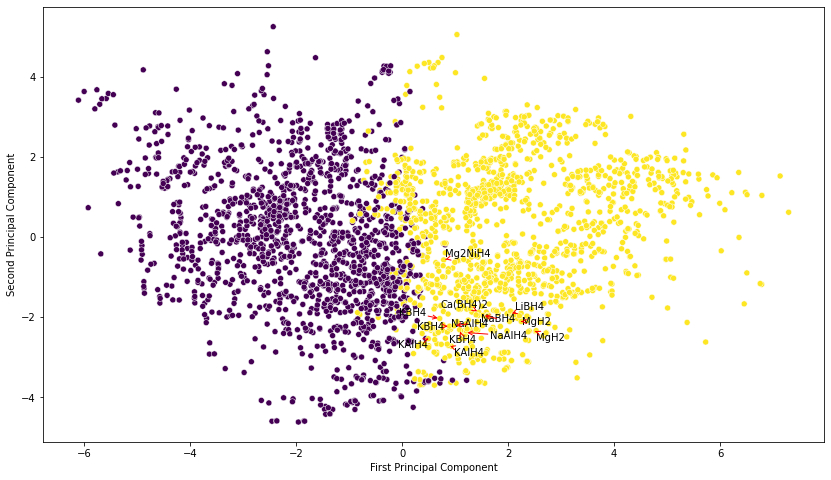

In [70]:
# #labels=['Cluster 1', 'Cluster2']
# plt.subplot(1,2,1)
# plt.figure(figsize=(10,9))
# sns.scatterplot(x=X_stander_pca[:,0],y=X_stander_pca[:,1],c=df["clusters"])#,label=labels)
# texts=[plt.text(X_stander_pca[i,0],X_stander_pca[i,1],nameit1['name'][i]) for i in range(0,nameit1.shape[0])] 
# adjust_text(texts,arrowprops=dict(arrowstyle='->', color ='red'))
# plt.show()
# plt.subplot(1,2,2)



plt.figure(figsize=(14,8))
sns.scatterplot(x=df['pca1'],y=df["pca2"],c=df["clusters"])#,label=labels)
texts=[plt.text(df["pca1"][i],df["pca2"][i],df['name'][i]) for i in range(0,df.shape[0]) if (df["name"][i] in list_material_referecne )] 
adjust_text(texts,arrowprops=dict(arrowstyle='->', color ='red'))
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.savefig("cluster2D.png")
plt.show()

In [71]:
# To visualize the data of our clusters 

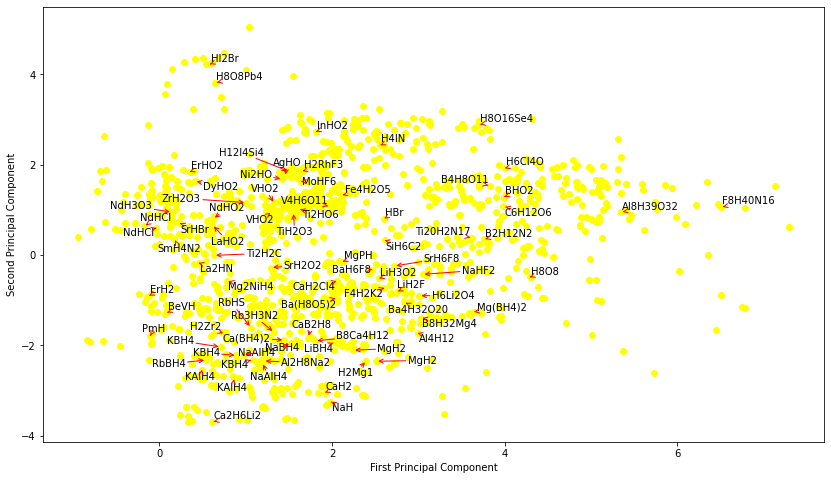

In [72]:
plt.figure(figsize=(14,8))
plt.scatter(list(df_cluster2["pca1"]),list(df_cluster2["pca2"]),color='yellow')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
texts=[plt.text(df_cluster2["pca1"][i],df_cluster2["pca2"][i],df_cluster2["name"][i]) for i in range(0,df_cluster2.shape[0],20)]
texts += (plt.text(df_cluster2["pca1"][i],df_cluster2["pca2"][i],df_cluster2["name"][i]) for i in range(0,df_cluster2.shape[0]) if (df_cluster2["name"][i] in list_material_referecne))
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='red'))
plt.savefig("cluster2D_hy.png")

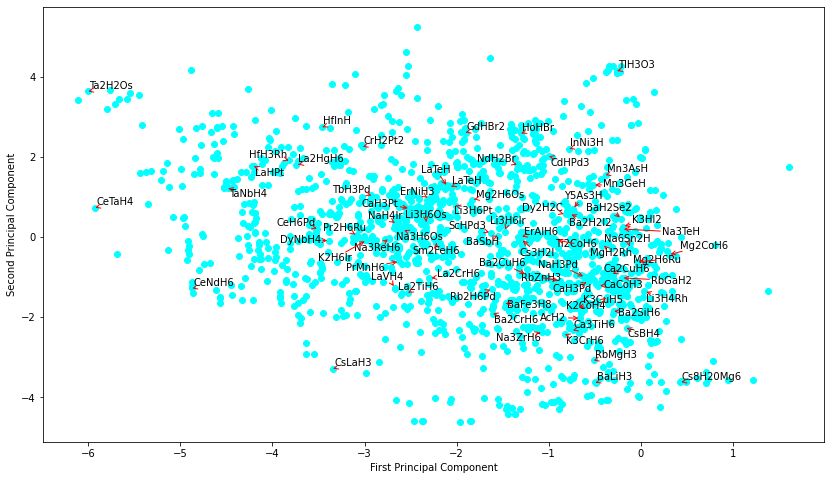

In [73]:
#"red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"
plt.figure(figsize=(14,8))
plt.scatter(list(df_cluster1["pca1"]),list(df_cluster1["pca2"]),color='cyan')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
texts=[plt.text(df_cluster1["pca1"][i],df_cluster1["pca2"][i],df_cluster1["name"][i]) for i in range(0,df_cluster1.shape[0],20)]
texts += (plt.text(df_cluster1["pca1"][i],df_cluster1["pca2"][i],df_cluster1["name"][i]) for i in range(0,df_cluster1.shape[0]) if (df_cluster1["name"][i] in list_material_referecne))
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='red'))
plt.savefig("cluster2D_nhy.png")

In [74]:
def similarity_measurements(df):
        #plt.figure(figsize=(12,10))
        #df_p=df.T#  because the df.corr( ) in pandas compute the correlation between column(variables)
        #pearson_matrix=df_p.corr(method="pearson") #   pearson correlation coefcient 
        #sns.heatmap(pearson_matrix)
        #plt.title("pearson correlation matrix ")
        #plt.savefig('pearson_correlation_matrix1.png')
        #plt.show()
        #time.sleep(20)
        plt.figure(figsize=(12,10))
        cos_similarity_matrix=cosine_similarity(df) #   cosine_similarity matrix
        sns.heatmap(cos_similarity_matrix)
        plt.title("Cosine Similarity matrices  ")
        plt.savefig('Music/cosine_similarity_matrix1.png')
        plt.show()
        
        time.sleep(20)
        plt.figure(figsize=(12,10))
        euclidean_distance_matrix=euclidean_distances(df) #   euclidean distance matrix
        sns.heatmap(euclidean_distance_matrix)
        plt.title("Euclidean Distance matrices  ")
        plt.savefig('Music/euclidean_distances_matrix1.png')
        plt.show()
        time.sleep(20)
        plt.figure(figsize=(12,10))
        manht_distances_matrix=manhattan_distances(df) #   manhattan_distances matrix
        sns.heatmap(euclidean_distance_matrix)
        plt.title("Manhattan distance matrices ")
        plt.savefig('Music/manhattan_distances_matrix1.png')
        plt.savefig("Music/elbaw_figure.png")
        plt.show()
        time.sleep(20)

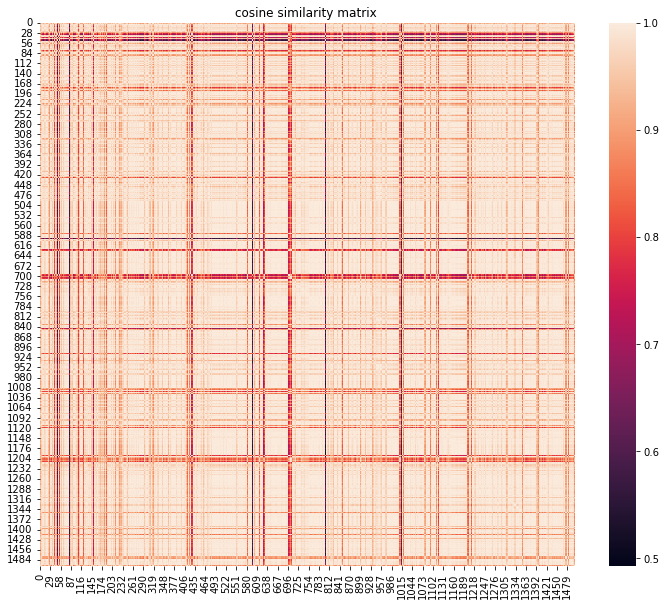

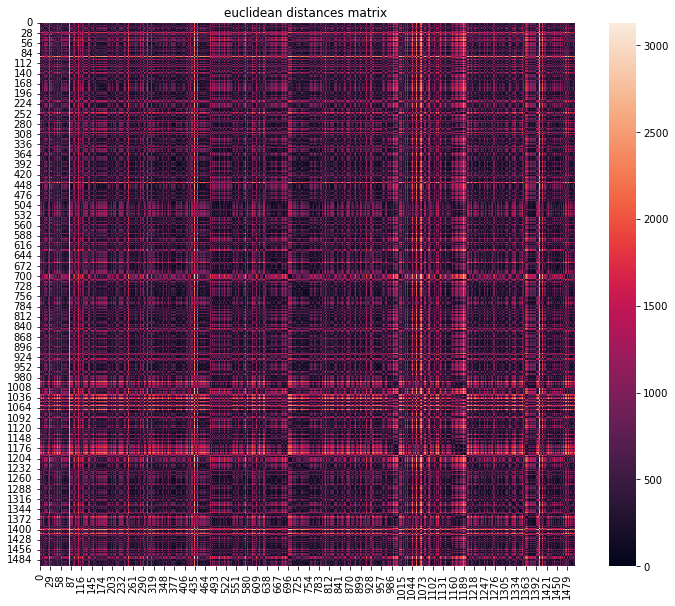

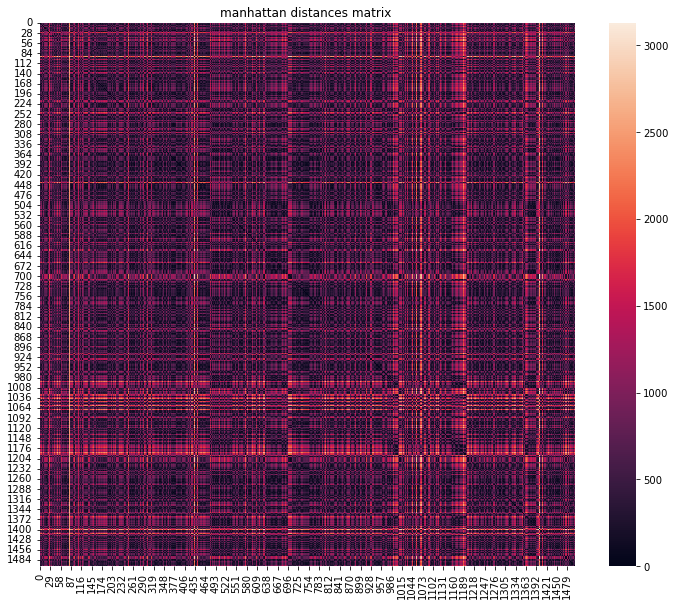

In [98]:
df_cluster1_without_pca_name=df_cluster1.loc[:,"delta_e":"nA_mean"]  # select all the rows and columns exept the name, pca1, pca2 columns
similarity_measurements(df_cluster1_without_pca_name)

In [ ]:
df_array=df_cluster1_without_pca_name.values

# cos_sim_matrix=cosine_similarity(df_array )

# cos_sim_matrix.shape

# plt.figure(figsize=(16,10))
# sns.heatmap(cos_sim_matrix)
# plt.savefig("Cosine similarity.png")
# plt.show()

# We can notice much that we have a big similarity between the materials in our data 

# Hight_similarity_masc=cos_sim_matrix>0.8
# Hight_similarity=cos_sim_matrix[Hight_similarity_masc]

# plt.figure(figsize=(16,10))
# sns.heatmap(Hight_similarity_masc)
# plt.savefig("Cosine similarity_masc.png")
# plt.show()

# Hight_similarity=cos_sim_matrix[Hight_similarity_masc]

# Hight_similarity_masc.shape[1]
# Hight_similarity_masc.shape[0]

# dict_indix_={}
# for i in range(Hight_similarity_masc.shape[0]):
#     for j in range(Hight_similarity_masc.shape[1]):
#         if cos_sim_matrix[i,j] > 0.9:
#             dict_indix_[str(i)]=j






### Cosine Similarity mesurements 

In [ ]:
df_cluster2[df_cluster2['name']=="MgH2"].index

Int64Index([86, 983], dtype='int64')

In [103]:
df_cluster2[df_cluster2['name']=="LiBH4"].index

Int64Index([6], dtype='int64')

In [107]:
cosine_similarity(df_array[6].reshape(1,21),df_array[86].reshape(1,21)) 

array([[0.96166827]])

In [110]:
df_cluster2[df_cluster2['name']=='Ca(BH4)2'].index

Int64Index([116], dtype='int64')

In [111]:
cosine_similarity(df_array[6].reshape(1,21),df_array[116].reshape(1,21)) 

array([[0.9670812]])

In [112]:
df_cluster2[df_cluster2['name']=='NaAlH4'].index

Int64Index([7, 769], dtype='int64')

In [120]:
cosine_similarity(df_array[116].reshape(1,21),df_array[6].reshape(1,21)) 

array([[0.9670812]])

In [141]:
df_cluster2[df_cluster2['name']=='NaZnH3'].index

Int64Index([], dtype='int64')

###  Eucliedean Distance

In [124]:
df_cluster2[df_cluster2['name']=='NaAlH4'].index

Int64Index([7, 769], dtype='int64')

In [125]:
df_cluster2[df_cluster2['name']=='KAlH4'].index

Int64Index([90, 782], dtype='int64')

In [130]:
euclidean_distances(df_array[769].reshape(1,21),df_array[782].reshape(1,21)) 

array([[192.79266311]])

### Manhatten Distance

In [136]:
df_cluster2[df_cluster2['name']=='LiH2F'].index

Int64Index([740], dtype='int64')

In [137]:
df_cluster2[df_cluster2['name']=='F4H2K2'].index

Int64Index([419, 420], dtype='int64')

In [140]:
manhattan_distances(df_array[740].reshape(1,21),df_array[419].reshape(1,21)) 

array([[550.01279038]])